# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [10]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [11]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [12]:
#  1. Get the total rides for each city type
total_rides_per_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_per_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [13]:
# 2. Get the total drivers for each city type
total_drivers_per_city_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_per_city_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [14]:
#  3. Get the total amount of fares for each city type
fare_total_per_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_total_per_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [15]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_per_city_type = fare_total_per_city_type / total_rides_per_city_type
avg_fare_per_ride_per_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [16]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_per_city_type = fare_total_per_city_type / total_drivers_per_city_type
avg_fare_per_driver_per_city_type

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [18]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Rides Per City Type" : total_rides_per_city_type,
    "Drivers Per City Type" : total_drivers_per_city_type,
    "Fare Total Per City Type" : fare_total_per_city_type,
    "Avg Fare Per Ride Per City Type" : avg_fare_per_ride_per_city_type,
    "Avg Fare Per Driver Per City Type" : avg_fare_per_driver_per_city_type
})

pyber_summary_df

,Rides Per City Type,Drivers Per City Type,Fare Total Per City Type,Avg Fare Per Ride Per City Type,Avg Fare Per Driver Per City Type
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [19]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [20]:
pyber_summary_df = pd.DataFrame({
    "Total Rides" : total_rides_per_city_type,
    "Total Drivers" : total_drivers_per_city_type,
    "Fare Total" : fare_total_per_city_type,
    "Average Fare Per Ride" : avg_fare_per_ride_per_city_type,
    "Average Fare Per Driver" : avg_fare_per_driver_per_city_type
})

pyber_summary_df

,Total Rides,Total Drivers,Fare Total,Average Fare Per Ride,Average Fare Per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [22]:
#  8. Format the columns.
pyber_summary_df ["Fare Total"] = pyber_summary_df["Fare Total"].map("{:.2f}".format)
pyber_summary_df ["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("{:.2f}".format)
pyber_summary_df ["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("{:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Fare Total,Average Fare Per Ride,Average Fare Per Driver
Rural,125,537,4327.93,34.62,8.06
Suburban,625,8570,19356.33,30.97,2.26
Urban,1625,59602,39854.38,24.53,0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [64]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [63]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_per_date = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
total_fare_per_date.tail()

fare
type  date                      
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

In [65]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_per_date = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
total_fare_per_date = total_fare_per_date.reset_index()
total_fare_per_date.tail()

,type,date,fare
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77
2374,Urban,2019-05-08 13:10:18,18.04


In [69]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_per_date_pivot = total_fare_per_date.pivot(index="date", columns="type", values="fare")
total_fare_per_date_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [74]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
total_fare_per_date_pivot_loc = total_fare_per_date_pivot.loc['2019-01-01':'2019-04-28']
total_fare_per_date_pivot_loc.head(5)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [75]:
total_fare_per_date_pivot_loc.tail(5)

type,Rural,Suburban,Urban
date,,,
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06
2019-04-27 23:52:44,NaN,45.98,NaN


In [85]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
total_fare_per_date_pivot_loc.index = pd.to_datetime(total_fare_per_date_pivot_loc.index)

In [86]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fare_per_date_pivot_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [116]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
total_fare_per_date_pivot_loc_week = total_fare_per_date_pivot_loc.resample("W").sum()
total_fare_per_date_pivot_loc_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


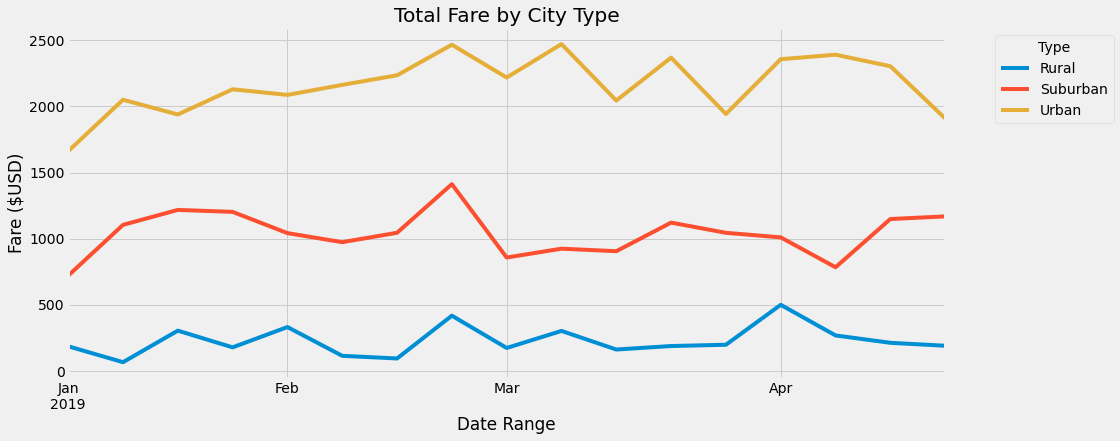

In [154]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
total_fare_per_date_pivot_loc_week.plot(xlabel="Date Range", ylabel="Fare ($USD)", title="Total Fare by City Type", figsize=(14,6)).legend(bbox_to_anchor=(1.2,1), title="Type")
plt.savefig("analysis/PyBer_fare_summary.png", bbox_inches='tight')